In [1]:
%%time

from pandas import DataFrame, Grouper
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import sys

CPU times: user 909 ms, sys: 302 ms, total: 1.21 s
Wall time: 1.4 s


In [2]:
%%time
# import our own stuff
sys.path.append("../python/src")

from tools import read_water_data, extract_features
from tools import get_oecd_iso3_code_mapping

from waterData import default_features

CPU times: user 255 ms, sys: 25.7 ms, total: 281 ms
Wall time: 364 ms


In [3]:
%%time
# set some options

datadir = "../data/"
cachedir = "../data/cache" 

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.2 µs


In [4]:
%%time

display("warming up cache")
null = read_water_data(setname="fullset",datadir=datadir,cachedir=cachedir)
del null

'warming up cache'

reading: ../data//crs1994-73.zip
reading: ../data//crs1999-95.zip
reading: ../data//crs2000-01.zip
reading: ../data//crs2002-03.zip
reading: ../data//crs2005-04.zip
reading: ../data//crs2006.zip
reading: ../data//crs2007.zip
reading: ../data//crs2008.zip
reading: ../data//crs2009.zip
reading: ../data//crs2010.zip
reading: ../data//crs2011.zip
reading: ../data//crs2012.zip
reading: ../data//crs2013.zip
reading: ../data//crs2014.zip
reading: ../data//crs2015.zip
reading: ../data//crs2016.zip
reading: ../data//crs2017.zip
reading: ../data//crs2018.zip
reading: ../data//crs2019.zip
Writing cached_df_file: ../data/cache/fullset.p
CPU times: user 4min 39s, sys: 4min 54s, total: 9min 34s
Wall time: 10min 23s


In [5]:
%%time

# read some data and get some mapping that may needs calculations

# the codemapping is generate over the full dataset to get all oecd-country-codes
# and from a fetch of the countries known to worldbank
codemapping = get_oecd_iso3_code_mapping(cachedir=cachedir,datadir=datadir)

# the data from oecd must be downloaded and saved as zips in the data-dir, check readme for links
oecddf = read_water_data(setname="fullset",datadir=datadir,cachedir=cachedir)


display("all data")
# tell me what it is
oecddf.describe()

Reading Datafrom cached file: ../data/cache/fullset.p
Writing cached_df_file: ../data/cache/countrycodes.p
Writing cached_file: ../data/cache/oecdiso3.p
Reading Datafrom cached file: ../data/cache/fullset.p


'all data'

CPU times: user 56.9 s, sys: 3min 6s, total: 4min 3s
Wall time: 5min 27s


,InitialReport,USD_Commitment,USD_Disbursement,USD_Received,USD_Commitment_Defl,USD_Disbursement_Defl,USD_Received_Defl,USD_Adjustment,USD_Adjustment_Defl,USD_AmountUntied,...,TypeRepayment,NumberRepayment,Interest2,USD_Interest,USD_Outstanding,USD_Arrears_Principal,USD_Arrears_Interest,CapitalExpend,PSIflag,PSIAddType
count,4.088256e+06,3.051025e+06,3.506449e+06,1.980515e+06,3.051025e+06,3.506449e+06,1.980515e+06,54325.000000,54325.000000,1.822440e+06,...,542849.000000,553752.000000,328270.000000,1.232437e+06,867437.000000,620176.000000,628093.000000,32296.000000,2161.000000,711.000000
mean,2.800947e+00,1.732823e+00,9.959690e-01,4.593473e-01,2.103196e+00,1.056015e+00,4.927653e-01,-0.810849,-0.912068,1.016804e+00,...,1.477022,1.869440,396.913882,2.375613e-01,8.368500,0.237621,0.283841,0.000090,1.987506,2.015471
std,2.083438e+00,2.047103e+01,1.487377e+01,7.843651e+00,2.414103e+01,1.565664e+01,8.306830e+00,12.451076,12.358834,1.542315e+01,...,1.184970,0.551107,584.336396,3.609668e+00,74.482526,9.964379,5.574769,0.001934,0.111103,0.984979
min,1.000000e+00,-1.421530e+03,-2.258730e+02,-5.030000e-01,-1.300270e+03,-2.461000e+02,-6.852520e-01,-1995.000000,-1870.620000,-1.421530e+03,...,0.000000,0.000000,0.000000,-3.491230e+01,-0.507119,-3.033060,-0.149653,0.000000,1.000000,1.000000
25%,1.000000e+00,0.000000e+00,3.781470e-03,-0.000000e+00,0.000000e+00,3.927740e-03,-0.000000e+00,-0.089212,-0.093630,0.000000e+00,...,1.000000,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
50%,3.000000e+00,2.214890e-02,4.171300e-02,0.000000e+00,2.389890e-02,4.416200e-02,0.000000e+00,-0.010290,-0.010783,4.355780e-03,...,1.000000,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,3.000000e+00,2.008640e-01,2.386590e-01,-0.000000e+00,2.280270e-01,2.531470e-01,0.000000e+00,-0.000900,-0.000928,1.263540e-01,...,1.000000,2.000000,750.000000,4.892500e-02,1.292290,0.000000,0.000000,0.000000,2.000000,3.000000
max,8.000000e+00,6.585080e+03,7.188450e+03,3.690330e+03,7.209450e+03,7.209450e+03,3.637680e+03,0.004700,0.004720,4.138840e+03,...,5.000000,52.000000,20000.000000,1.460130e+03,24053.000000,4317.120000,1586.170000,0.100000,2.000000,3.000000


In [6]:
%%time

# filter out useless / unrelevant data
df = oecddf[oecddf['USD_Commitment'] != 0.0]

df = df[df['USD_Commitment'].notnull()]

# tell me what is left
display("filtered for entries with commitment")
display(df.describe())

df = df[df['FlowCode'].isin(['13','11'])]

display("only FolowCode 11 and 13")

display(df.describe())

df = df[df['RecipientCode'].isin(codemapping)]
display("filter regions - only countries that can have an IncomeGroup-Classification")

display(df.describe())


df = df[df['CommitmentDate'] > datetime(year=1995,month=12,day=31)]
df = df[df['CommitmentDate'] < datetime(year=2019,month=1,day=1)]

display("oecd historyical incomegroupdata is only available for the the years 1996-2019. filtering everything else")

display(df.describe())

# reduce to relevant features
df = extract_features(df,features=default_features)

# free the memory
del oecddf


'filtered for entries with commitment'

,InitialReport,USD_Commitment,USD_Disbursement,USD_Received,USD_Commitment_Defl,USD_Disbursement_Defl,USD_Received_Defl,USD_Adjustment,USD_Adjustment_Defl,USD_AmountUntied,...,TypeRepayment,NumberRepayment,Interest2,USD_Interest,USD_Outstanding,USD_Arrears_Principal,USD_Arrears_Interest,CapitalExpend,PSIflag,PSIAddType
count,2.167197e+06,2.172952e+06,1.736396e+06,766378.000000,2.172952e+06,1.736396e+06,766378.000000,87.000000,87.000000,1.237312e+06,...,71407.000000,71016.000000,96433.000000,370804.000000,337438.000000,281073.000000,286744.000000,15666.000000,912.000000,451.000000
mean,2.682844e+00,2.433043e+00,9.363383e-01,0.118274,2.953081e+00,9.760340e-01,0.125440,-12.693976,-12.988416,1.495886e+00,...,1.446777,1.831770,164.207552,0.047093,1.227611,0.007632,0.140781,0.000046,1.982456,1.809313
std,2.829606e+00,2.422188e+01,1.673700e+01,8.328325,2.856187e+01,1.754458e+01,8.849678,40.264784,42.234928,1.868331e+01,...,1.231441,0.713704,464.997867,1.822843,63.558487,0.378839,1.865710,0.000721,0.131358,0.970224
min,1.000000e+00,-1.421530e+03,-5.909380e+01,-0.110413,-1.300270e+03,-5.123210e+01,-0.097833,-206.515000,-221.799000,-1.421530e+03,...,0.000000,0.000000,0.000000,-13.129400,0.000000,-0.099531,0.000000,0.000000,1.000000,1.000000
25%,1.000000e+00,1.588260e-02,8.258313e-03,0.000000,1.693630e-02,8.466930e-03,0.000000,-4.399575,-4.552170,3.210530e-03,...,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
50%,1.000000e+00,7.899780e-02,4.172955e-02,-0.000000,8.701090e-02,4.351140e-02,-0.000000,-0.338083,-0.383889,4.975555e-02,...,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,3.000000e+00,4.200000e-01,1.892330e-01,-0.000000,4.827175e-01,1.977710e-01,-0.000000,-0.000831,-0.000874,3.095355e-01,...,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000
max,8.000000e+00,6.585080e+03,6.585080e+03,2624.190000,7.209450e+03,7.209450e+03,2809.160000,0.000000,0.000000,4.138840e+03,...,5.000000,52.000000,9250.000000,667.097000,24053.000000,66.597200,154.083000,0.024000,2.000000,3.000000


'only FolowCode 11 and 13'

,InitialReport,USD_Commitment,USD_Disbursement,USD_Received,USD_Commitment_Defl,USD_Disbursement_Defl,USD_Received_Defl,USD_Adjustment,USD_Adjustment_Defl,USD_AmountUntied,...,TypeRepayment,NumberRepayment,Interest2,USD_Interest,USD_Outstanding,USD_Arrears_Principal,USD_Arrears_Interest,CapitalExpend,PSIflag,PSIAddType
count,2.107633e+06,2.107633e+06,1.688510e+06,736326.000000,2.107633e+06,1.688510e+06,736326.000000,23.000000,23.000000,1.229830e+06,...,54083.000000,53839.000000,93497.000000,359958.000000,333463.000000,279215.000000,284876.000000,15169.000000,346.000000,57.000000
mean,2.686228e+00,1.686963e+00,7.514214e-01,0.012130,2.047288e+00,7.846187e-01,0.013669,-4.594981,-4.562844,1.345369e+00,...,1.441433,1.809766,155.924026,0.011432,0.434302,0.003047,0.132515,0.000048,1.962428,2.368421
std,2.831176e+00,1.788758e+01,1.457907e+01,0.774741,2.087172e+01,1.533204e+01,0.881783,15.774887,15.384268,1.522409e+01,...,1.256066,0.714718,429.826086,0.685732,43.470579,0.151703,1.602477,0.000733,0.190435,0.837334
min,1.000000e+00,-1.421530e+03,-2.863010e+01,-0.110413,-1.300270e+03,-2.875030e+01,-0.097833,-71.461000,-68.598900,-1.421530e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.000000e+00,1.517000e-02,8.071000e-03,0.000000,1.614600e-02,8.298430e-03,0.000000,0.000000,0.000000,3.143720e-03,...,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
50%,1.000000e+00,7.387540e-02,4.007210e-02,-0.000000,8.139740e-02,4.180130e-02,-0.000000,0.000000,0.000000,4.903450e-02,...,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000
75%,3.000000e+00,3.818490e-01,1.790000e-01,-0.000000,4.352960e-01,1.870688e-01,-0.000000,0.000000,0.000000,3.020160e-01,...,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000
max,8.000000e+00,6.585080e+03,6.585080e+03,248.900000,7.209450e+03,7.209450e+03,288.942000,0.000000,0.000000,4.087360e+03,...,5.000000,12.000000,6300.000000,284.616000,24053.000000,15.784300,38.043100,0.024000,2.000000,3.000000


'filter regions - only countries that can have an IncomeGroup-Classification'

,InitialReport,USD_Commitment,USD_Disbursement,USD_Received,USD_Commitment_Defl,USD_Disbursement_Defl,USD_Received_Defl,USD_Adjustment,USD_Adjustment_Defl,USD_AmountUntied,...,TypeRepayment,NumberRepayment,Interest2,USD_Interest,USD_Outstanding,USD_Arrears_Principal,USD_Arrears_Interest,CapitalExpend,PSIflag,PSIAddType
count,1.732484e+06,1.732484e+06,1.393851e+06,594498.000000,1.732484e+06,1.393851e+06,594498.000000,2.000000,2.000000,969297.000000,...,51555.000000,51893.000000,76406.000000,299829.000000,272865.000000,231256.000000,236107.000000,11699.000000,211.000000,38.000000
mean,2.748025e+00,1.645588e+00,6.147061e-01,0.014033,2.042915e+00,6.474774e-01,0.015937,-2.767986,-2.767856,1.378298,...,1.343769,1.857611,189.655690,0.013581,0.510574,0.002618,0.111597,0.000061,1.985782,2.526316
std,2.878446e+00,1.578286e+01,1.051624e+01,0.842558,1.925197e+01,1.102682e+01,0.964376,3.908609,3.908793,16.140566,...,1.113269,0.661789,466.115313,0.751203,48.010003,0.124387,1.454800,0.000833,0.118670,0.725476
min,1.000000e+00,-2.005710e+01,-1.442740e+01,0.000000,-2.180880e+01,-1.565590e+01,0.000000,-5.531790,-5.531790,-20.057100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.000000e+00,1.428808e-02,7.880000e-03,0.000000,1.511315e-02,8.045160e-03,0.000000,-4.149888,-4.149823,0.002619,...,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
50%,1.000000e+00,6.822540e-02,3.751450e-02,0.000000,7.511220e-02,3.903640e-02,0.000000,-2.767986,-2.767856,0.045341,...,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000
75%,3.000000e+00,3.540660e-01,1.619090e-01,-0.000000,4.055060e-01,1.696995e-01,-0.000000,-1.386084,-1.385888,0.287152,...,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000
max,8.000000e+00,4.087440e+03,4.087440e+03,248.900000,4.704100e+03,4.704100e+03,288.942000,-0.004182,-0.003921,4087.360000,...,5.000000,12.000000,6300.000000,284.616000,24053.000000,14.391200,38.043100,0.024000,2.000000,3.000000


'oecd historyical incomegroupdata is only available for the the years 1996-2019. filtering everything else'

,InitialReport,USD_Commitment,USD_Disbursement,USD_Received,USD_Commitment_Defl,USD_Disbursement_Defl,USD_Received_Defl,USD_Adjustment,USD_Adjustment_Defl,USD_AmountUntied,...,TypeRepayment,NumberRepayment,Interest2,USD_Interest,USD_Outstanding,USD_Arrears_Principal,USD_Arrears_Interest,CapitalExpend,PSIflag,PSIAddType
count,1.180470e+06,1.180470e+06,976293.000000,411077.000000,1.180470e+06,976293.000000,411077.000000,2.000000,2.000000,661237.000000,...,26157.000000,26496.000000,34645.000000,205770.000000,198584.000000,166610.000000,171461.000000,3227.000000,174.000000,2.0
mean,2.542955e+00,1.612057e+00,0.668805,0.008728,1.743803e+00,0.705948,0.009150,-2.767986,-2.767856,1.451913,...,1.563062,1.830163,249.281936,0.015725,0.666097,0.003597,0.153602,0.000220,1.988506,3.0
std,2.740364e+00,1.647253e+01,11.636289,0.593536,1.729818e+01,12.246613,0.605174,3.908609,3.908793,16.541136,...,1.405308,0.867212,535.645488,0.788253,56.157428,0.146324,1.705256,0.001576,0.106901,0.0
min,1.000000e+00,-2.005710e+01,-14.427400,0.000000,-2.180880e+01,-15.655900,0.000000,-5.531790,-5.531790,-20.057100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.0
25%,1.000000e+00,1.364260e-02,0.007963,0.000000,1.469000e-02,0.008274,0.000000,-4.149888,-4.149823,0.003352,...,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.0
50%,1.000000e+00,6.463025e-02,0.038772,0.000000,7.151300e-02,0.041129,0.000000,-2.767986,-2.767856,0.046928,...,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.0
75%,3.000000e+00,3.317480e-01,0.170126,-0.000000,3.720057e-01,0.182610,-0.000000,-1.386084,-1.385888,0.294306,...,1.000000,2.000000,697.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.0
max,8.000000e+00,4.087440e+03,4087.440000,155.161000,4.704100e+03,4704.100000,155.161000,-0.004182,-0.003921,4087.360000,...,5.000000,12.000000,6300.000000,284.616000,24053.000000,14.391200,38.043100,0.024000,2.000000,3.0


CPU times: user 44.1 s, sys: 1min 35s, total: 2min 20s
Wall time: 3min 9s


In [7]:
%%time

display("read the historical classification in Incomegroups from the worldbank")
icgroup_df = pd.read_csv(datadir+"/OGHIST.csv",header=0,quotechar='"',low_memory=False,sep=";",na_values=['..'])

# the historical data some datapoints
# fill missing values with the value from the next valid year 
# this is a little dirty in code
T = icgroup_df.T

T = T.fillna(method ='backfill') 

icgroup_df = T.T
icgroup_df = icgroup_df.melt(id_vars=('id','Country'),var_name="Year")

# replace the values used for classification with the values used by oecd
icgroup_df = icgroup_df.replace({'value': {'L': 'LDCs','LM': 'LMICs', 'UM':'UMICs','H': 'HICs', 'LM*':'LMICs'}})
# give it a nice name
icgroup_df = icgroup_df.rename(columns={'value': 'IncomeGroup'})
# create a mergeable unique feature
icgroup_df['mergefield'] = icgroup_df['Year'].apply(lambda x: str(x))
icgroup_df['mergefield'] = icgroup_df['mergefield'] + icgroup_df['id']


'read the historical classification in Incomegroups from the worldbank'

CPU times: user 121 ms, sys: 33.1 ms, total: 154 ms
Wall time: 185 ms


In [8]:
%%time

display("create a mergefield within the dataframe") 
df['mergefield'] = df['CommitmentDate'].apply(lambda x: str(x.year))
df['mergefield'] = df['mergefield'] + df['RecipientCode'].apply(lambda x: codemapping[x])

df = df.merge(icgroup_df.add_prefix("worldbank "),
                       right_on='worldbank mergefield',
                       how="left",left_on='mergefield')
df.drop(columns=['worldbank id','worldbank Country',
                'worldbank Year','worldbank mergefield'],inplace=True)

'create a mergefield within the dataframe'

CPU times: user 9.74 s, sys: 1.12 s, total: 10.9 s
Wall time: 11 s


In [9]:
%%time

hist_oecd_ig=pd.read_csv(filepath_or_buffer=datadir + "oecd-incomegroup-history.csv",
                         dtype={'year': np.unicode_, 'RecipientCode': np.unicode_},
                         delimiter=";")
hist_oecd_ig.rename(inplace=True,
                    columns={'incomegroup': "Incomegroup (oecd hist)",'RecipientCode':'oecdid'})
display(hist_oecd_ig.sample())
hist_oecd_ig['mergefield'] = hist_oecd_ig['year'] 
hist_oecd_ig['mergefield'] = hist_oecd_ig['mergefield'] + hist_oecd_ig['iso3code']
df = df.merge(hist_oecd_ig,on="mergefield",how="left")

,country,year,Incomegroup (oecd hist),oecdid,iso3code
2288,Mongolia,2010,Lower Middle Income Countries,753,MNG


CPU times: user 2.88 s, sys: 461 ms, total: 3.34 s
Wall time: 3.38 s


<AxesSubplot:title={'center':'mUSD (Defl) per IncomeGroup (sum)'}, xlabel='CommitmentYear'>

<AxesSubplot:title={'center':'mUSD (Defl) per IncomeGroup (sum)'}, xlabel='CommitmentYear'>

<AxesSubplot:title={'center':'mUSD (Defl) per IncomeGroup (sum)'}, xlabel='CommitmentYear'>

CPU times: user 9.16 s, sys: 2.46 s, total: 11.6 s
Wall time: 11.7 s


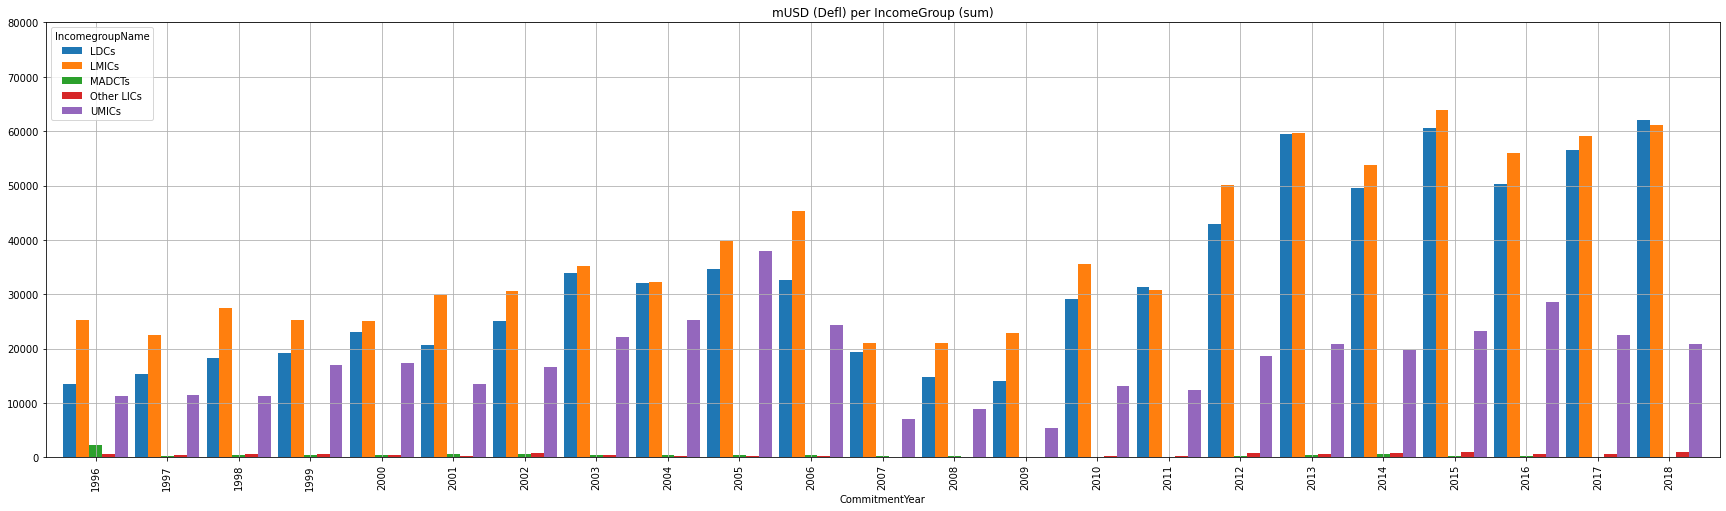

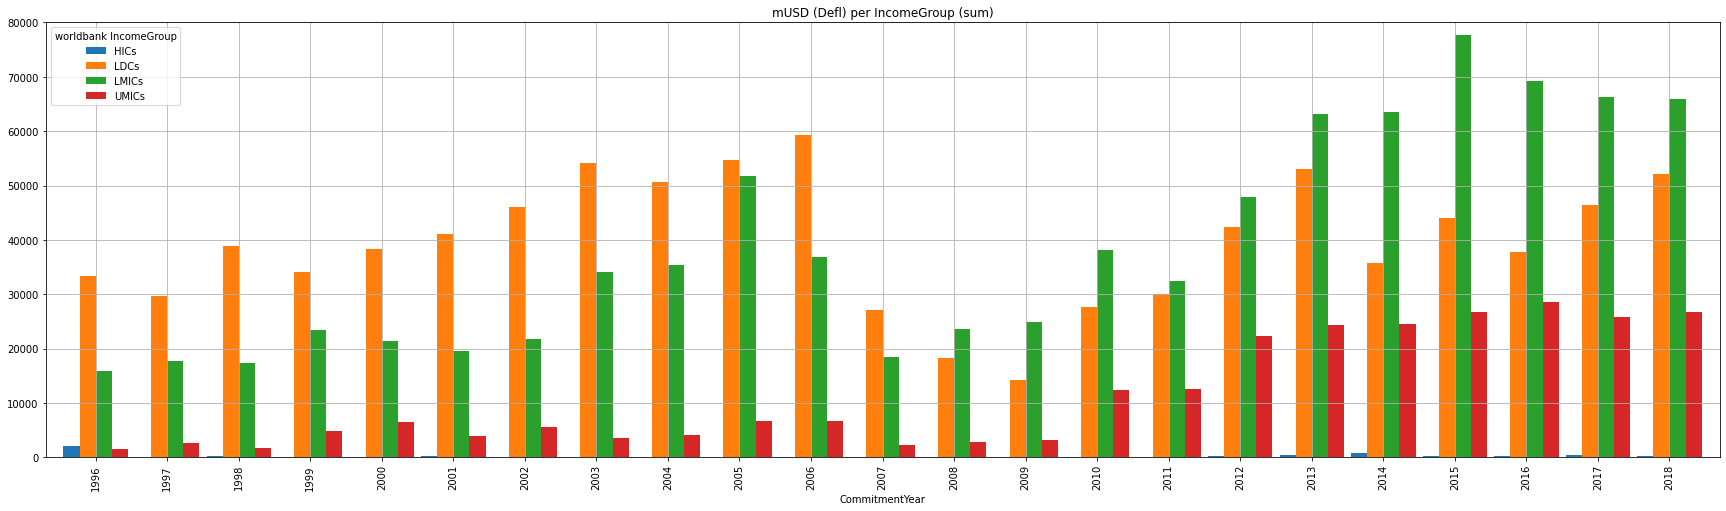

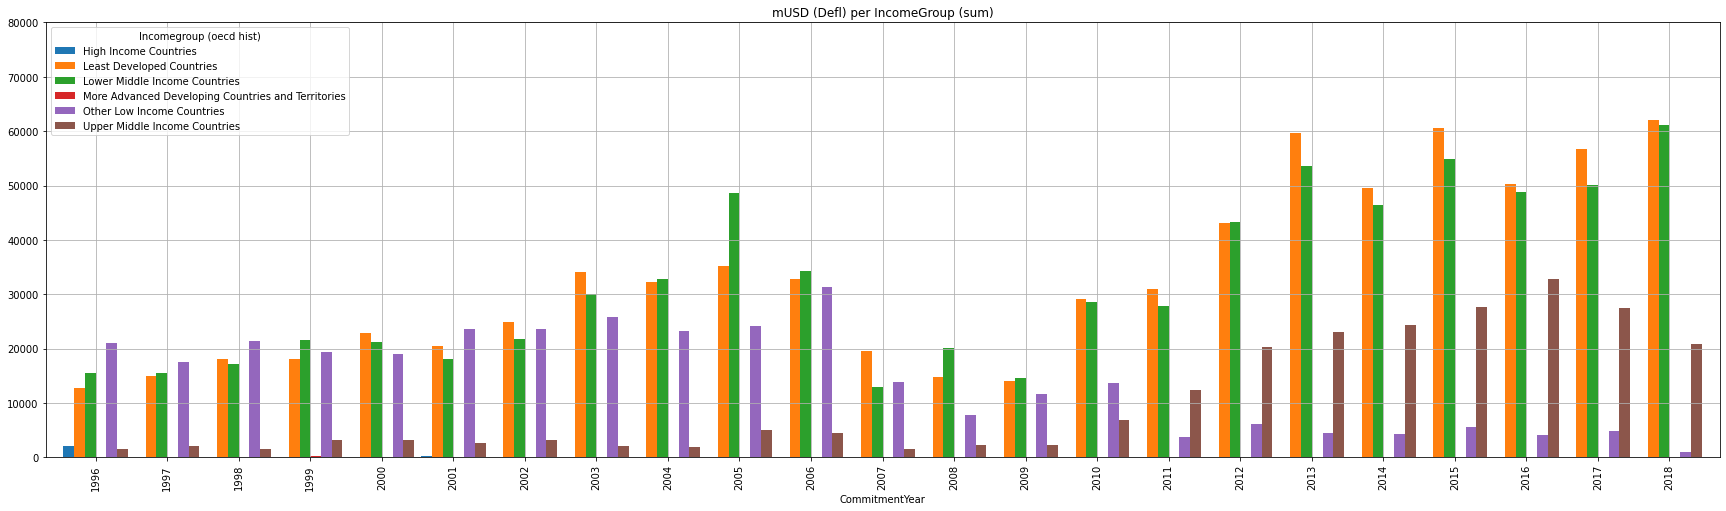

In [10]:
%%time

for igclassname in ["IncomegroupName","worldbank IncomeGroup","Incomegroup (oecd hist)"]:

    groupeddf= df.set_index("CommitmentDate")


    #display(df[df[incomegroupclassfeaturename].isnull()])
    groupeddf = groupeddf.groupby([Grouper(freq="A"), igclassname])['USD_Commitment_Defl']

    # resolve grouping, unstack, fill missing and reset_index()
    groupeddf = groupeddf.sum().unstack().fillna(0.0).reset_index()

    # an absolut view
    # create index on year as string and drop old index
    groupeddf["CommitmentYear"]=groupeddf["CommitmentDate"].apply(lambda x: str(x.year))
    groupeddf = groupeddf.drop(columns=["CommitmentDate"]).set_index("CommitmentYear")

    # plot absolut sum
    display(groupeddf.plot(width=0.9,grid=True,kind='bar',title="mUSD (Defl) per IncomeGroup (sum)",figsize=(30,8),
             ylim=(0, 80000)
             #color={"LDCs": "blue", "LMICs": "orange", "UMICs": "green","Other LICs": "black","MADCTs": "black"}
            ))
    

In [11]:
%%time

display("beautify the graphs by setting equal names")
df.replace({"IncomegroupName": { 
                "MADCTs": "HICs",
                "Other LICs": "LDCs"
            },
            "worldbank IncomeGroup": {
                "LDCS": "LDCs"
                
            },
            "Incomegroup (oecd hist)": {
                "High Income Countries": "HICs",
                "Least Developed Countries": "LDCs",
                "Lower Middle Income Countries": "LMICs",
                "More Advanced Developing Countries and Territories": "HICs",
                "Other Low Income Countries": "LDCs",
                "Upper Middle Income Countries": "UMICs"
                
            }},inplace=True)

'beautify the graphs by setting equal names'

CPU times: user 1.55 s, sys: 455 ms, total: 2.01 s
Wall time: 2.06 s


<AxesSubplot:title={'center':'mUSD (Defl) per IncomeGroup (sum)'}, xlabel='CommitmentYear'>

<AxesSubplot:title={'center':'mUSD (Defl) per IncomeGroup (sum)'}, xlabel='CommitmentYear'>

<AxesSubplot:title={'center':'mUSD (Defl) per IncomeGroup (sum)'}, xlabel='CommitmentYear'>

CPU times: user 6.59 s, sys: 1.4 s, total: 7.99 s
Wall time: 8.05 s


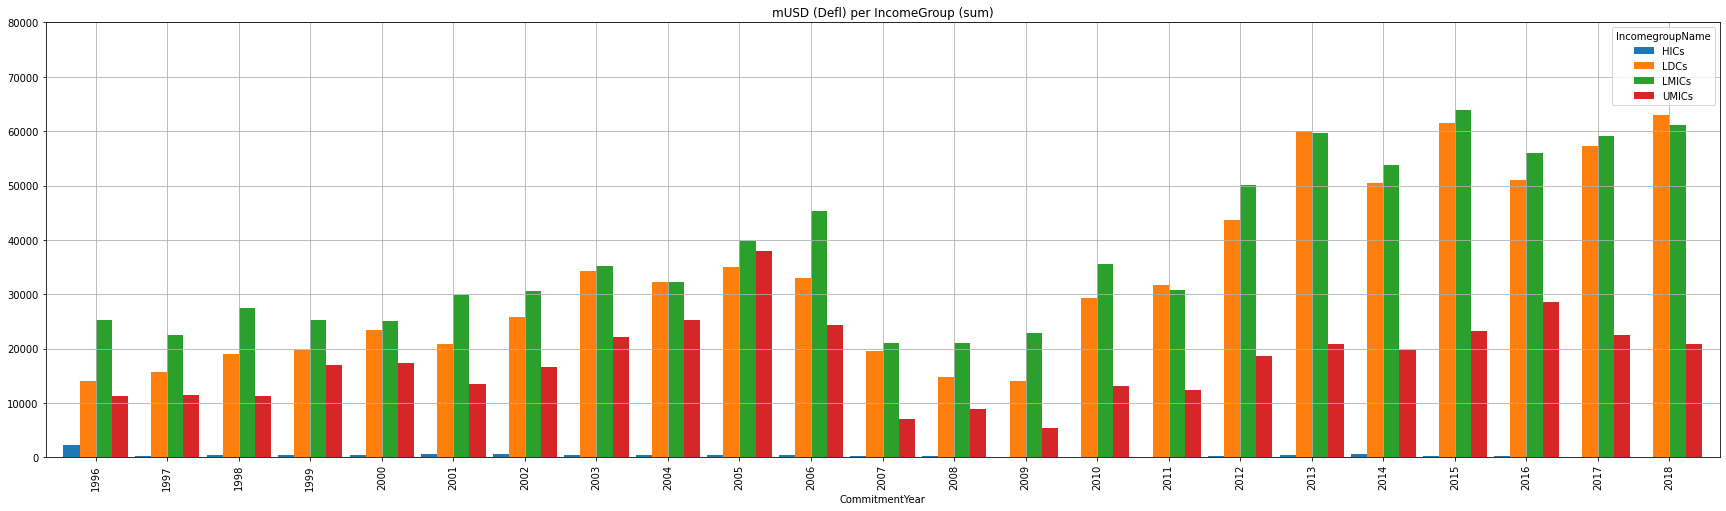

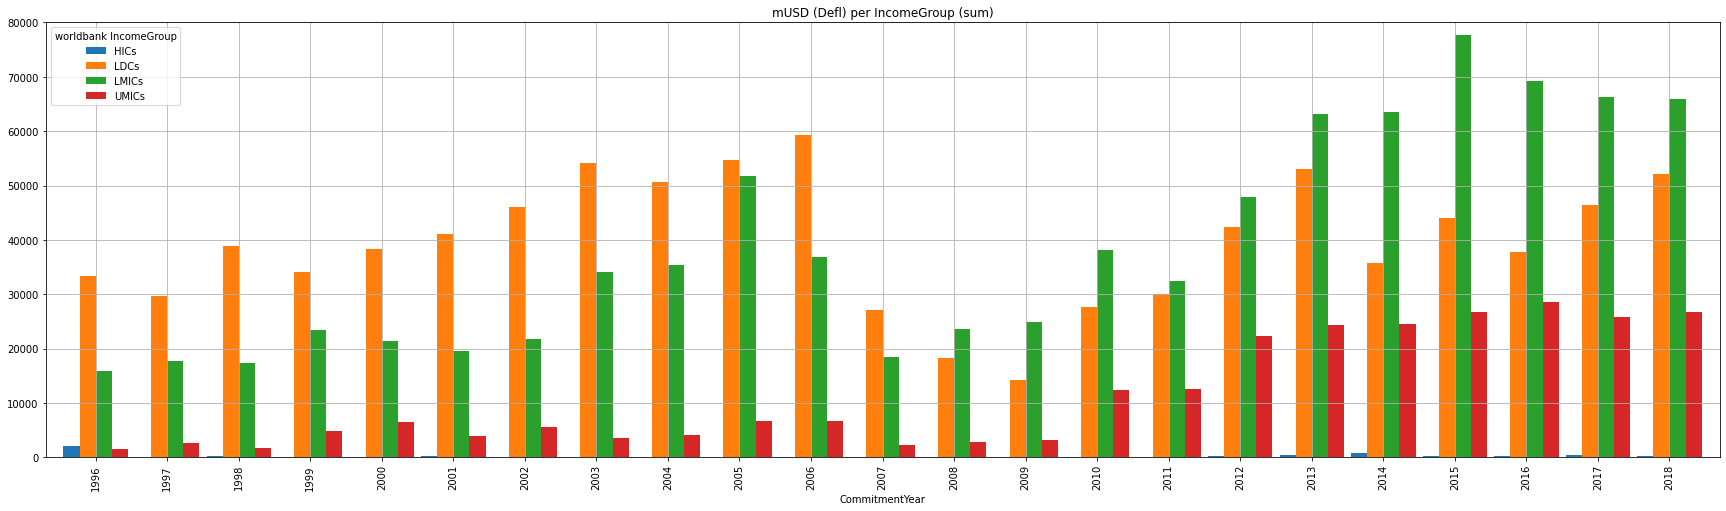

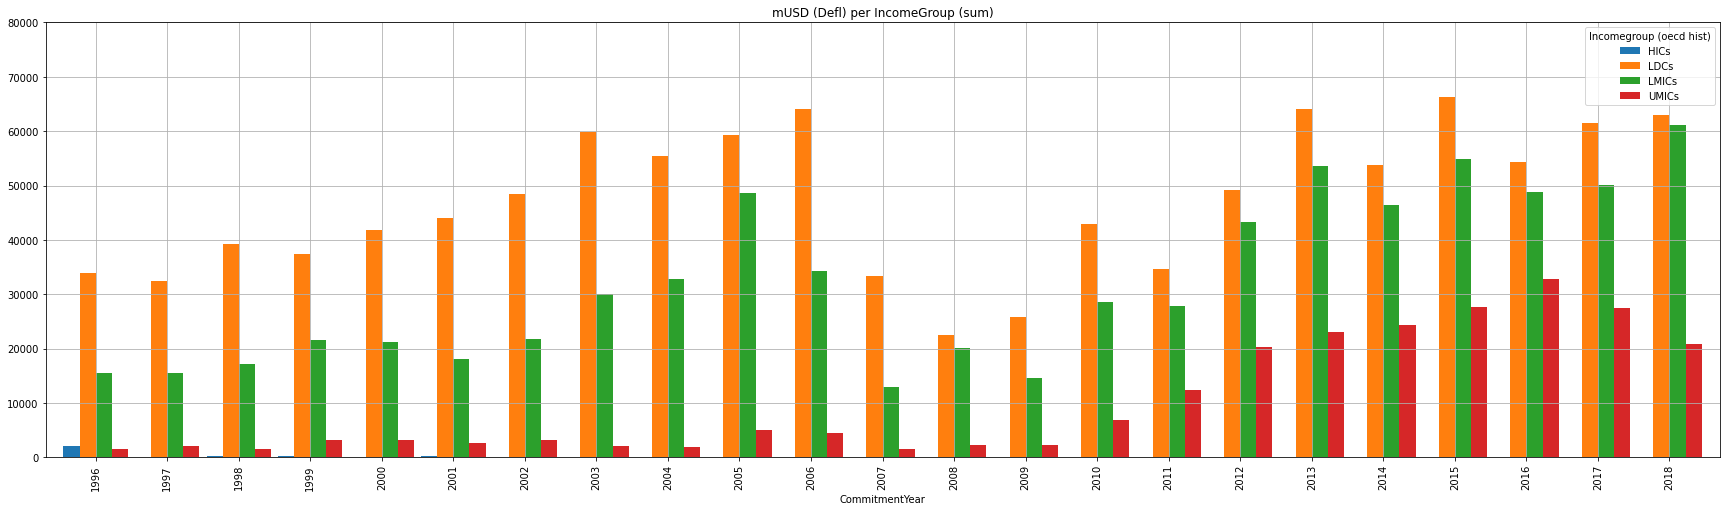

In [12]:
%%time

for igclassname in ["IncomegroupName","worldbank IncomeGroup","Incomegroup (oecd hist)"]:

    groupeddf= df.set_index("CommitmentDate")

    #display(df[df[incomegroupclassfeaturename].isnull()])
    groupeddf = groupeddf.groupby([Grouper(freq="A"), igclassname])['USD_Commitment_Defl']

    # resolve grouping, unstack, fill missing and reset_index()
    groupeddf = groupeddf.sum().unstack().fillna(0.0).reset_index()

    # an absolut view
    # create index on year as string and drop old index
    groupeddf["CommitmentYear"]=groupeddf["CommitmentDate"].apply(lambda x: str(x.year))
    groupeddf = groupeddf.drop(columns=["CommitmentDate"]).set_index("CommitmentYear")

    # plot absolut sum
    display(groupeddf.plot(width=0.9,grid=True,kind='bar',title="mUSD (Defl) per IncomeGroup (sum)",figsize=(30,8),
             ylim=(0, 80000)
             #color={"LDCs": "blue", "LMICs": "orange", "UMICs": "green","Other LICs": "black","MADCTs": "black"}
            ))
    

<AxesSubplot:title={'center':'mUSD (Defl) per IncomeGroup (sum)'}, xlabel='CommitmentYear'>

<AxesSubplot:title={'center':'mUSD (Defl) per IncomeGroup (sum)'}, xlabel='CommitmentYear'>

<AxesSubplot:title={'center':'mUSD (Defl) per IncomeGroup (sum)'}, xlabel='CommitmentYear'>

CPU times: user 7.31 s, sys: 1.43 s, total: 8.74 s
Wall time: 8.84 s


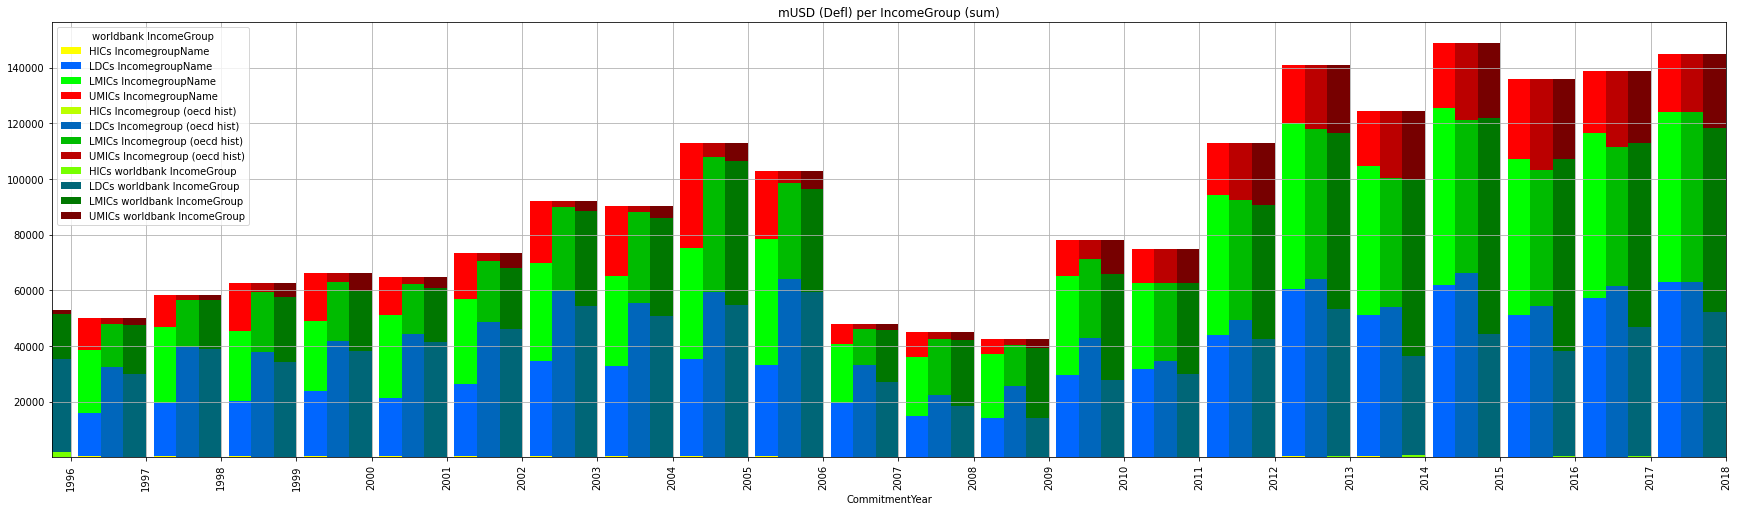

In [13]:
%%time

fig,ax = plt.subplots(figsize=(30,8))
width=[-0.3,-0.6,-0.9]
color={"LDCs": ["#0066ff","#0066bb","#006677"],
       "LMICs": ["#00ff00","#00bb00","#007700"],
       "UMICs": ["#ff0000","#bb0000","#770000"],
       "HICs": ["#ffff00","#bbff00","#77ff00"]}

for (i,igclassname) in enumerate(["IncomegroupName","Incomegroup (oecd hist)","worldbank IncomeGroup"]):

    groupeddf= df.set_index("CommitmentDate")
    groupeddf.replace({
        igclassname: {
            "LDCs": "LDCs "+igclassname,
            "LMICs": "LMICs "+igclassname,
            "UMICs": "UMICs "+igclassname,
            "HICs": "HICs "+igclassname
        }},inplace=True)

    #display(df[df[incomegroupclassfeaturename].isnull()])
    groupeddf = groupeddf.groupby([Grouper(freq="A"), igclassname])['USD_Commitment_Defl']

    # resolve grouping, unstack, fill missing and reset_index()
    groupeddf = groupeddf.sum().unstack().fillna(0.0).reset_index()

    # an absolut view
    # create index on year as string and drop old index
    groupeddf["CommitmentYear"]=groupeddf["CommitmentDate"].apply(lambda x: str(x.year))
    groupeddf = groupeddf.drop(columns=["CommitmentDate"]).set_index("CommitmentYear")
    # plot absolut sum_
    display(groupeddf.plot(stacked=True,ax=ax,width=width[2-i],align="edge",grid=True,kind='bar',title="mUSD (Defl) per IncomeGroup (sum)",figsize=(30,8),
             #ylim=(0, 8000
             color={"LDCs " + igclassname: color["LDCs"][i],
                    "LMICs " + igclassname: color["LMICs"][i],
                    "UMICs " + igclassname: color["UMICs"][i],
                    "HICs " + igclassname: color["HICs"][i]}
            ))
    